In [2]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import pearsonr
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA
from sklearn import manifold
import pylab
import scipy.cluster.hierarchy as sch
import pandas as pd

In [46]:
path = os.path.join('cichy_data', 'all_noshuffle_wavenetclass_semb10_drop0.4', 'sub_emb.mat')
data = np.array(loadmat(path)['X'])

In [3]:
data.shape

(15, 10)

In [47]:
# pairwise distances
dist_mat = distance_matrix(data, data)

In [6]:
for d in dist_mat:
    d = [str(t) for t in d]
    #print('\t'.join(d))

In [8]:
# cluster embeddings
mds = manifold.MDS()
mds_data = mds.fit_transform(data)
tsne = manifold.TSNE()
tsne_data = tsne.fit_transform(data)

/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


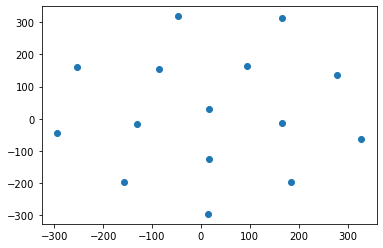

In [12]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])

In [25]:
# load accuracy recovery matrix
df = pd.read_csv('emb_matrix.txt', sep="\t", header=0)
emb_matrix = df.to_numpy()
dist_matrix = 1 - emb_matrix
dist_matrix = (dist_matrix + dist_matrix.T)/2

In [32]:
# cluster accuracy matrices
mds = manifold.MDS()
mds_data = mds.fit_transform(emb_matrix.T)
tsne = manifold.TSNE()
tsne_data = tsne.fit_transform(emb_matrix.T)

/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [26]:
# cluster average recovered accuracies both ways matrices
mds = manifold.MDS(dissimilarity='precomputed')
mds_data = mds.fit_transform(dist_matrix)
tsne = manifold.TSNE(metric='precomputed')
tsne_data = tsne.fit_transform(dist_matrix)

/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


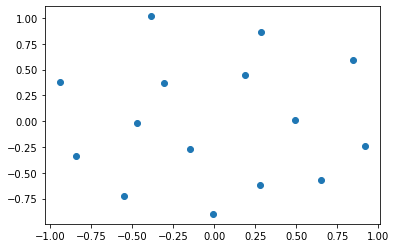

In [34]:
plt.scatter(mds_data[:, 0], mds_data[:, 1])

/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_3012/672112163.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method='centroid')


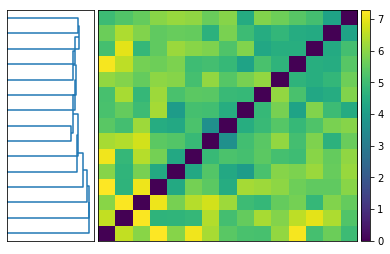

In [48]:
D = dist_mat

# Compute and plot dendrogram.
fig = pylab.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)

In [12]:
pca = PCA(10)
pca.fit(data)

PCA(n_components=10)

In [13]:
data_pca = pca.transform(data)

In [16]:
data_pca.shape

(15, 10)

In [14]:
losses = np.array([0.388252169, 0.289999992, 0.061253563, 0.112696148, 0.471509963, 0.464949936, 0.428164989,
                   0.318116993, 0.705128193, 0.212553501, 0.490662158, 0.52285713, 0.637268841, 0.454415947,
                   0.159771755])

In [19]:
for i in range(10):
    R = pearsonr(data_pca[:, i], losses)
    print(R)

(-0.08441318130106498, 0.7648621656323589)
(0.170553174848983, 0.5433706006163662)
(0.037797839719343196, 0.8936106239588107)
(0.42059076259824796, 0.11850791273365809)
(0.0026670686163731694, 0.9924734383175551)
(-0.25837123580578414, 0.3524852418745564)
(-0.26461697238872334, 0.34054633704712595)
(-0.3453863787426796, 0.20735519379301923)
(0.22293371353859237, 0.4244984108063906)
(0.6135417814038514, 0.014989626602006968)


In [20]:
dist_mat = distance_matrix(data_pca[:, :9], data_pca[:, :9])

In [6]:
a = np.argsort(trans[:, 1])
for i in range(15):
    print(a[i])

13
9
4
3
10
7
6
8
2
14
11
0
12
1
5


In [7]:
a = np.sort(trans[:, 1])
for i in range(15):
    print(a[i])

-2.7713237
-1.5848564
-1.2942537
-1.1458896
-0.96686363
-0.8512446
-0.6140935
0.27170765
0.27438506
0.3201905
1.0133637
1.0717618
1.2812381
1.8232166
3.1726623


In [14]:
# vector length
for a in data:
    print(np.linalg.norm(a, 2))

3.1475883
4.669107
3.3961842
3.4729512
3.7277327
4.6251507
4.637158
3.6892009
4.107788
3.6550326
3.6904097
4.046842
3.725337
3.4583468
3.2108207
